<h1>Projeto - A3 - Análises Descritivas e Modelos Analíticos para problemas de negócios

<h4> Integrantes: </h4>
• Henrique Lopes Martins - RA: 12523129945<br>
• Kauan Guilherme dos Santos Araujo - RA: 1252229754<br>
• Leonardo Almeida - RA: 12523142601<br>
• Jefferson Dantas dos Santos - RA: 125111360482<br>
• Thiago Ferreira Silva - RA: 12522225451<br>

-----------------------------------------------------------------------------------------------------------------------

<h4> Dataset : Credit Card Approval Prediction </h4>
Kaggle: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

• Contexto: Os cartões de pontuação de crédito são um método comum de controle de risco no setor financeiro. Ele usa informações pessoais e dados enviados por solicitantes de cartão de crédito para prever a probabilidade de inadimplência (falta de cumprimento) futura e de empréstimos com cartão de crédito. O banco pode decidir se emitirá um cartão de crédito para o solicitante. Os scores de crédito podem quantificar objetivamente a magnitude do risco.

• Base de dados: Temos 2 datasets, o primeiro com os dados de clientes e o segundo mostrando a situação simulada de cada cliente.



-------------------------

<h4>Objetivos do projeto:</h4>

• Criar um modelo capaz de prever se o cliente é bom ou ruim, baseado no status que ele tem.

• Realizar a analise de dados, e implementar algum tipo de modelo de ML, atendendo o requisitos da documentação oficial da A3


-------------------------


### Importação das bibliotecas


In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from pycaret.classification import *
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

### Analise Exploratória de Dados (EDA)

In [2]:
df=pd.read_csv('application_record.csv')

df.sample(1)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
90494,5358999,F,N,Y,0,81000.0,Pensioner,Higher education,Civil marriage,House / apartment,-24649,365243,1,0,0,0,NaN,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

Explicação das features:

•ID - ID do cliente.<br>
•CODE_GENDER - Genero.<br>
•FLAG_OWN_CAR - Possui carro.<br>
•FLAG_OWN_REALTY - Possui imovel.<br>
•CNT_CHILDREN - Numero de filhos.<br>
•AMT_INCOME_TOTAL - Ganho anual.<br>
•NAME_INCOME_TYPE - Tipo de renda.<br>
•NAME_EDUCATION_TYPE - Nivel educacional<br>
•NAME_FAMILY_STATUS - Estado civil.<br>
•NAME_HOUSING_TYPE - Tipo de moradia.<br>
•DAYS_BIRTH - Idade, contando -1 para cada dia , 0 é o dia atual.<br>
•DAYS_EMPLOYED - Tempo de serviço, contando -1 para cada dia e 0 é o dia atual.<br>
•FLAG_MOBILE - Possui telefone movel.<br>
•FLAG_WORK_PHONE - Possui telefone do trabalho.<br>
•FLAG_PHONE - Possui telefone fixo.<br>
•FLAG_EMAIL - Possui e-mail.<br>
•OCCUPATION_TYPE - Profissão. <br>	
•CNT_FAM_MEMBERS - Quantidade de membros familiares. <br>

In [4]:
df_alvo=pd.read_csv('credit_record.csv')

df_alvo.sample(1)

,ID,MONTHS_BALANCE,STATUS
466514,5056128,-4,C


In [5]:
df_alvo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


Explicação das features do dataset com a variavel alvo:

• ID - ID do cliente <br>
• MONTHS_BALANCE - O mês dos dados extraídos é o ponto de partida, de trás para frente, 0 é o mês atual, -1 é o mês anterior e assim por diante <br>
• STATUS - 0: 1-29 dias de atraso - 1: 30-59 dias de atraso  - 2: 60-89 dias de atraso - 3: 90-119 dias de atraso - 4: 120-149 dias de atraso - 5: Dívidas vencidas ou incobráveis, baixas por mais de 150 dias - C: pago naquele mês X: Nenhum empréstimo no mês

In [6]:
# Alterando o nome das variaveis para melhorar a compreensão do dataset
df_tratado=df.rename(columns={'CODE_GENDER':'COD_GENERO',
                              'FLAG_OWN_CAR':'FLAG_CARRO',
                              'FLAG_OWN_REALTY':'FLAG_IMOVEL',
                             'CNT_CHILDREN':'QTD_FILHOS',
                             'AMT_INCOME_TOTAL':'GANHO_ANUAL',
                             'NAME_INCOME_TYPE':'TIPO_RENDA',
                             'NAME_EDUCATION_TYPE':'GRAU_ESCOLAR',
                             'NAME_FAMILY_STATUS':'ESTADO_CIVIL',
                             'NAME_HOUSING_TYPE':'MORADIA',
                             'DAYS_BIRTH':'IDADE',
                             'DAYS_EMPLOYED':'DIAS_TRABALHADOS',
                             'FLAG_MOBIL':'FLAG_CELULAR',
                             'FLAG_WORK_PHONE':'FLAG_CELULAR_EMP',
                             'OCCUPATION_TYPE':'PROFISSAO',
                             'CNT_FAM_MEMBERS':'QTD_FAMILIARES'})

Analisando as distribuições das variaveis binárias

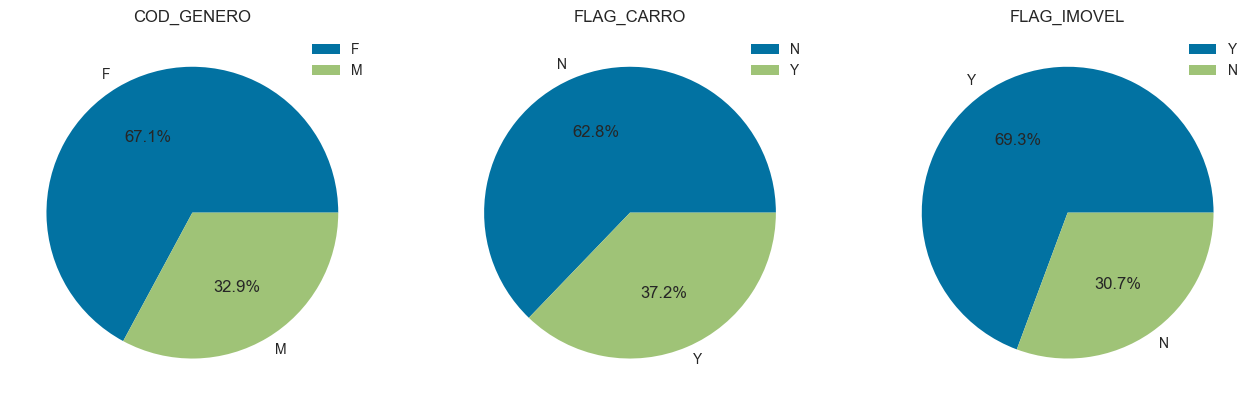

In [18]:

colunas = ['COD_GENERO', 'FLAG_CARRO', 'FLAG_IMOVEL']

#Estrutura logica para plotar um grafico de pizza para cada coluna que definimos acima
plt.figure(figsize=(16 , 9))  
for i in range(len(colunas)):
    plt.subplot(1, 3, i+1)
    plt.title(colunas[i]) 

    contador = df_tratado[colunas[i]].value_counts()
    plt.pie(contador, labels=contador.index, autopct='%1.1f%%')

    plt.legend(contador.index)
plt.show()

Analisando a distribuição de variaveis categóricas

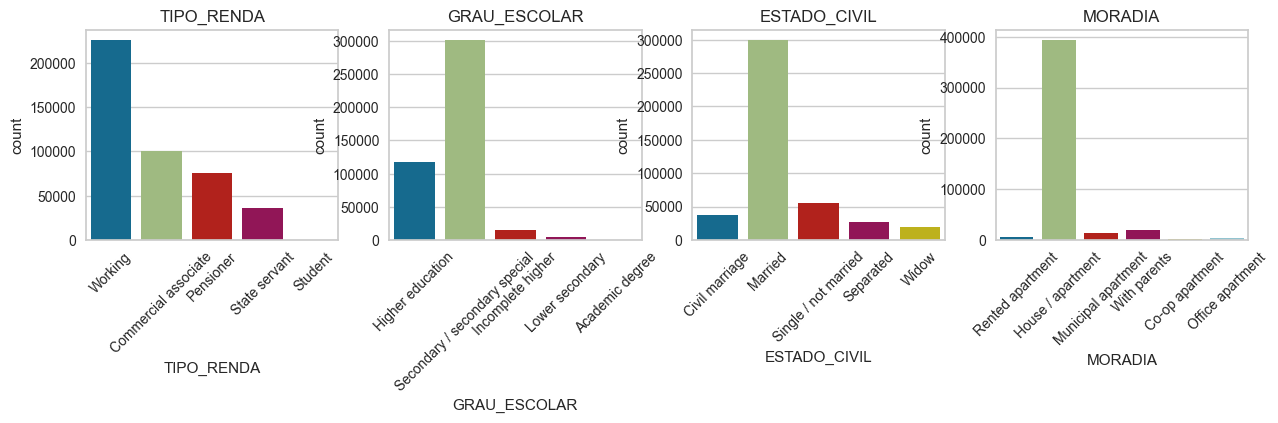

In [29]:
colunas2 = ['TIPO_RENDA', 'GRAU_ESCOLAR', 'ESTADO_CIVIL', 'MORADIA']

plt.figure(figsize=(15, 6))

for i in range(len(colunas2)):
    plt.subplot(2, 4, i+1)
    plt.title(colunas2[i])
    sns.countplot(data=df_tratado, x=df_tratado[colunas2[i]])
    plt.xticks(rotation=45)
plt.show()

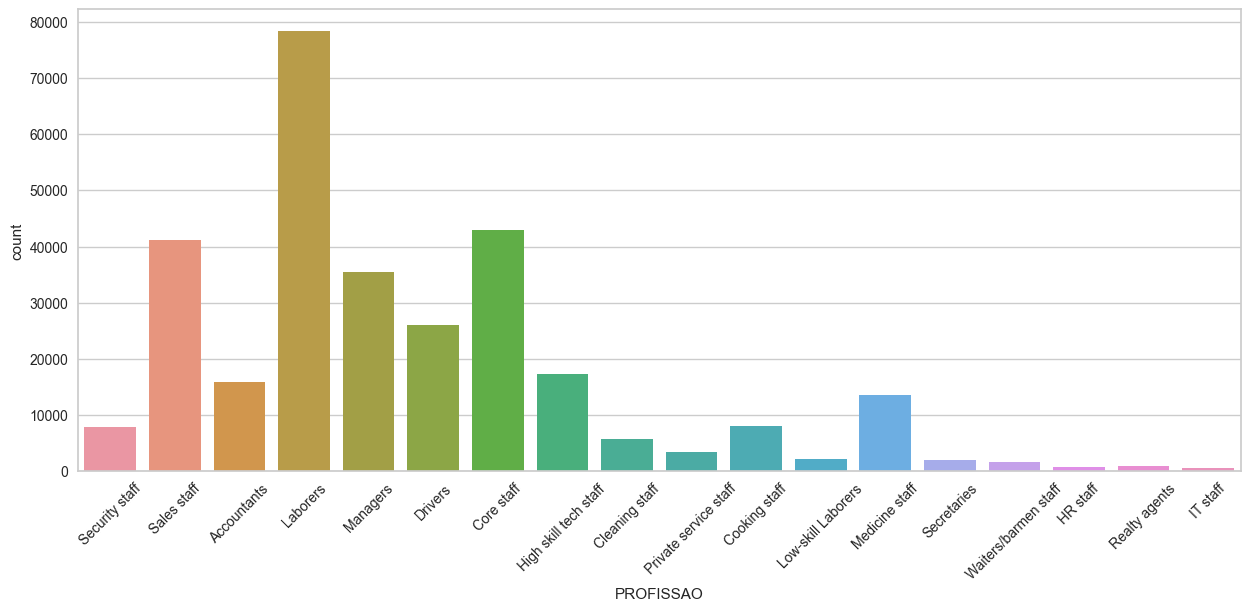

In [32]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_tratado, x='PROFISSAO')
plt.xticks(rotation=45)
plt.show()

Analisando a distribuição de variaveis númericas

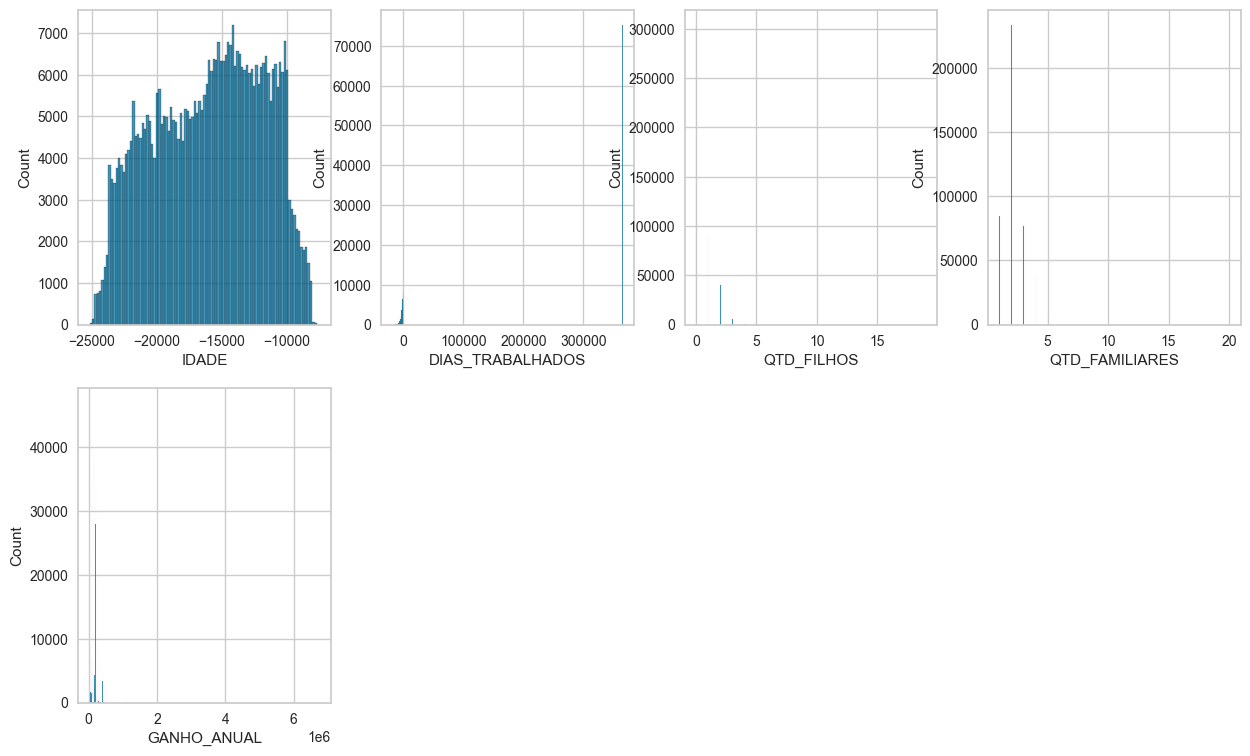

In [43]:
colunas3 = ['IDADE', 'DIAS_TRABALHADOS', 'QTD_FILHOS', 'QTD_FAMILIARES','GANHO_ANUAL']

plt.figure(figsize=(15, 9))

for i in range(len(colunas3)):
    plt.subplot(2, 4, i+1)
    sns.histplot(data=df_tratado, x=df_tratado[colunas3[i]])
  
plt.show()

Identificando possiveis outlier nos dados

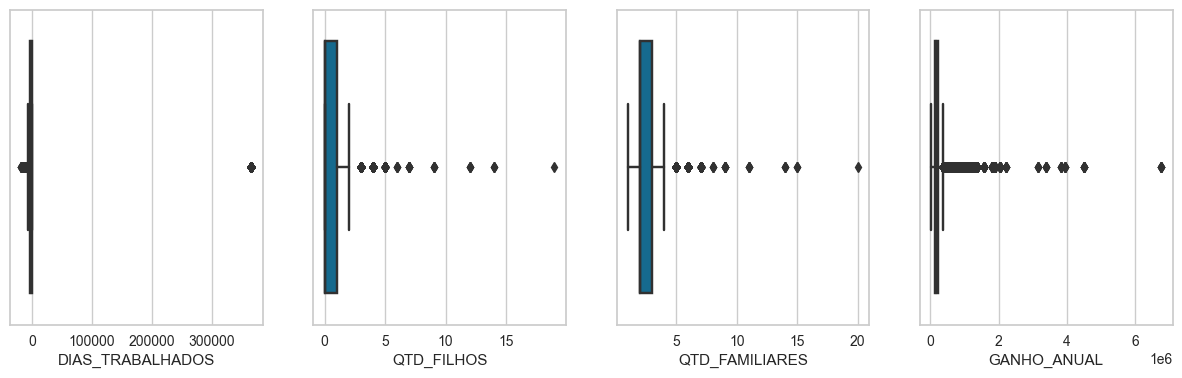

In [44]:
colunas_out = ['DIAS_TRABALHADOS', 'QTD_FILHOS', 'QTD_FAMILIARES','GANHO_ANUAL']

plt.figure(figsize=(15, 9))

for i in range(len(colunas_out)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data=df_tratado, x=df_tratado[colunas_out[i]])
  
plt.show()

Usando o heatmap para verificar como as variaveis se relacionam

In [10]:
df_corr_teste= pd.merge(df_tratado,df_alvo, on='ID', how='inner')

<Axes: >

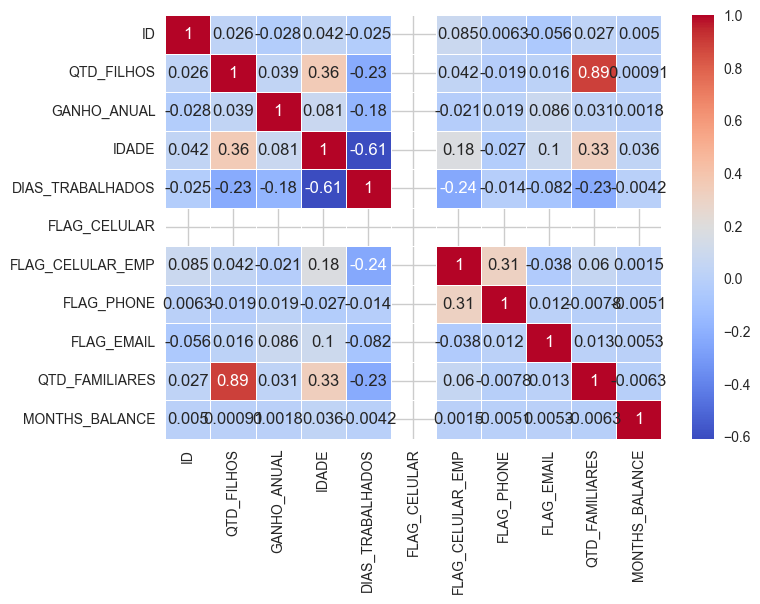

In [18]:
correlacao_df = df_corr_teste.corr()

sns.heatmap(correlacao_df, annot=True, cmap='coolwarm',linewidths=0.5)

### Transformação de variaveis (ETL)

##### Variaveis categoricas

One-Hot Encoding


In [7]:
# Passe para a variavel a coluna que precisa alterar
variavel_genero=df_tratado['COD_GENERO'] 

# get_dummies é quem faz o one-hot, precisando passar a variavel com a coluna como parametro
oh=pd.get_dummies(variavel_genero)

# Depois é só dar um join() passando a variavel que foi transformada, no dataframe que estamos trabalhando. 
df_tratado= df_tratado.join(oh)


In [8]:
# Estado Civil
variavel_renda=df_tratado['ESTADO_CIVIL']
oh=pd.get_dummies(variavel_renda)
df_tratado= df_tratado.join(oh)

In [9]:
# Tipo Renda
variavel_renda=df_tratado['TIPO_RENDA']
oh=pd.get_dummies(variavel_renda)
df_tratado= df_tratado.join(oh)

In [10]:
# Moradia
variavel_renda=df_tratado['MORADIA']
oh=pd.get_dummies(variavel_renda)
df_tratado= df_tratado.join(oh)

In [11]:
# Grau Escolar
variavel_renda=df_tratado['GRAU_ESCOLAR']
oh=pd.get_dummies(variavel_renda)
df_tratado= df_tratado.join(oh)

Convertendo o tipo da variavel alvo

In [39]:
# Usando replace para fazer os valores de C e X se tornarem numericos
df_alvo['STATUS']= df_alvo['STATUS'].replace('C',6)
df_alvo['STATUS']= df_alvo['STATUS'].replace('X',7)

# Transformando a feature em inteira já que mesmo após o replace o tipo dela continuava sendo "object"
df_alvo['STATUS']=df_alvo['STATUS'].astype(int)
df_alvo['STATUS'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1048575 entries, 0 to 1048574
Series name: STATUS
Non-Null Count    Dtype
--------------    -----
1048575 non-null  int32
dtypes: int32(1)
memory usage: 4.0 MB


In [40]:
df_alvo['STATUS'].sample()

676356    7
Name: STATUS, dtype: int32

Label Encoder 

In [12]:
# Exemplo antes da transformação
df_tratado['FLAG_CARRO'].unique()

array(['Y', 'N'], dtype=object)

In [13]:
# Define a função que executa a transformação
lb = LabelEncoder()
df_tratado['FLAG_CARRO'] =lb.fit_transform(df_tratado['FLAG_CARRO'])

# .classes_ na variavel lb é para retornar como ficará a codificação como estamos apenas com duas variaveis será 0 e 1
lb.classes_

array(['N', 'Y'], dtype=object)

In [14]:
df_tratado['FLAG_IMOVEL'] = lb.fit_transform(df_tratado['FLAG_IMOVEL'])

In [15]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ID                             438557 non-null  int64  
 1   COD_GENERO                     438557 non-null  object 
 2   FLAG_CARRO                     438557 non-null  int32  
 3   FLAG_IMOVEL                    438557 non-null  int32  
 4   QTD_FILHOS                     438557 non-null  int64  
 5   GANHO_ANUAL                    438557 non-null  float64
 6   TIPO_RENDA                     438557 non-null  object 
 7   GRAU_ESCOLAR                   438557 non-null  object 
 8   ESTADO_CIVIL                   438557 non-null  object 
 9   MORADIA                        438557 non-null  object 
 10  IDADE                          438557 non-null  int64  
 11  DIAS_TRABALHADOS               438557 non-null  int64  
 12  FLAG_CELULAR                  

##### Variaveis Númericas

Transformações de escala

In [17]:
# Transformando a idade dos clientes para o padrão 0-100 anos

# Lógica aplicada de acordo com a formatação original da variavel, se ele pega a quantidades de dias anteriores ao dia atual
# Basta fazer o calculo dos dias divido pela escala de dias anuais(365). Assim devolvendo a idade aproximada do cliente 
df_tratado['IDADE']= (df_tratado['IDADE'].abs()/365).round(2)

In [18]:
df_tratado['IDADE'].sample(5)

432198    36.78
125381    43.69
183661    42.65
396656    32.10
309174    57.67
Name: IDADE, dtype: float64

In [23]:
# De acordo com a variavel original se tiver alguem com valor positivo no 'DIAS_TRABALHADOS' significa que esse cliente está desempregado
# Logo identificamos que não havia nenhum outro valor acima de zero que não fosse 365243
# Tomamos a decisão de transformar esses valores em 0 para manter a normal da variavel e ainda representar que esse cliente está desempregado

df_pesquisa=df_tratado.loc[(df_tratado['DIAS_TRABALHADOS'] > 0)]
df_pesquisa['DIAS_TRABALHADOS']

7         365243
8         365243
9         365243
76        365243
160       365243
           ...  
438549    365243
438550    365243
438551    365243
438552    365243
438555    365243
Name: DIAS_TRABALHADOS, Length: 75329, dtype: int64

In [27]:
df_pesquisa['DIAS_TRABALHADOS'].nunique()

1

In [28]:
df_tratado['DIAS_TRABALHADOS']

0          -4542
1          -4542
2          -1134
3          -3051
4          -3051
           ...  
438552    365243
438553     -3007
438554      -372
438555    365243
438556     -1201
Name: DIAS_TRABALHADOS, Length: 438531, dtype: int64

In [29]:
df_tratado['DIAS_TRABALHADOS']=df_tratado['DIAS_TRABALHADOS'].replace(365243,0).abs()

In [31]:
df_tratado['DIAS_TRABALHADOS'].sample(3)

166202    2597
366582       0
120967    5576
Name: DIAS_TRABALHADOS, dtype: int64

Removendo outliers

In [19]:
df_tratado.groupby(['QTD_FILHOS']).size()

QTD_FILHOS
0     304071
1      88527
2      39884
3       5430
4        486
5        133
6          4
7          9
9          5
12         4
14         3
19         1
dtype: int64

In [20]:
# Removendo outlier quantidade de filhos
outlier_criancas=df_tratado.loc[df_tratado['QTD_FILHOS']>=6]

df_tratado=df_tratado.drop(outlier_criancas.index)


In [21]:
df_tratado.groupby(['QTD_FILHOS']).size()

QTD_FILHOS
0    304071
1     88527
2     39884
3      5430
4       486
5       133
dtype: int64

In [32]:
#Removendo os valores de outlier do GANHO_ANUAL

Q1 = df_tratado['GANHO_ANUAL'].quantile(0.25)
Q3 = df_tratado['GANHO_ANUAL'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [33]:
df_sem_outliers = df_tratado[(df_tratado['GANHO_ANUAL'] >= limite_inferior) & (df_tratado['GANHO_ANUAL'] <= limite_superior)]

In [34]:
df_sem_outliers

,ID,COD_GENERO,FLAG_CARRO,FLAG_IMOVEL,QTD_FILHOS,GANHO_ANUAL,TIPO_RENDA,GRAU_ESCOLAR,ESTADO_CIVIL,MORADIA,...,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,0,0,0,0,0,1
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,0,0,0,0,0,0,0,1
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,0,0,0,0,0,0,0,1
5,5008810,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,0,0,0,0,0,0,0,1
6,5008811,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,0,1,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,1,0,0,0,0,0,0,0,0,1
438553,6840222,F,0,0,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,1,0,0,0,0,0,0,0,0,1
438554,6841878,F,0,0,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,...,0,0,0,0,1,0,1,0,0,0
438555,6842765,F,0,1,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,0,0,0,0,0,1


<strong>Salvando o dataset pós análise e limpeza, e tirando variávies de alta correlação

In [35]:
# O caso 'PROFISSAO' removemos pelo fator de que se fizessemos One-hot nesta feature ela expandiria muito a dimensionalidade do dataset

df_final=df_sem_outliers.drop(columns={'COD_GENERO','TIPO_RENDA','GRAU_ESCOLAR','ESTADO_CIVIL','MORADIA','PROFISSAO','FLAG_PHONE'})

In [36]:
df_final.info()

df_final.to_csv('dados_clientes_aprovacao_tratado2.csv' , index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419423 entries, 2 to 438556
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ID                             419423 non-null  int64  
 1   FLAG_CARRO                     419423 non-null  int32  
 2   FLAG_IMOVEL                    419423 non-null  int32  
 3   QTD_FILHOS                     419423 non-null  int64  
 4   GANHO_ANUAL                    419423 non-null  float64
 5   IDADE                          419423 non-null  float64
 6   DIAS_TRABALHADOS               419423 non-null  int64  
 7   FLAG_CELULAR                   419423 non-null  int64  
 8   FLAG_CELULAR_EMP               419423 non-null  int64  
 9   FLAG_EMAIL                     419423 non-null  int64  
 10  QTD_FAMILIARES                 419423 non-null  float64
 11  F                              419423 non-null  uint8  
 12  M                             

### Pré-processamento

In [64]:
df_treino=pd.read_csv('dados_clientes_aprovacao_tratado.csv')

Normalizando dados

In [65]:

# Padronização
scaler = StandardScaler()
data_normalizado= scaler.fit_transform(df_treino)

In [66]:
df_normalizado=pd.DataFrame(data_normalizado)

In [67]:
df_normalizado

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-1.772797,1.299579,0.665034,-0.591838,2.179862,-0.944301,0.988383,0.0,1.962508,-0.348346,...,-2.967294,-0.183026,-0.094996,8.509206,-0.213262,-0.026683,1.652748,-0.187223,-0.09656,-1.485667
1,-1.772795,1.299579,0.665034,-0.591838,2.179862,-0.944301,0.988383,0.0,1.962508,-0.348346,...,-2.967294,-0.183026,-0.094996,8.509206,-0.213262,-0.026683,1.652748,-0.187223,-0.09656,-1.485667
2,-1.772793,1.299579,0.665034,-0.591838,-0.681498,1.321884,-0.433159,0.0,-0.509552,-0.348346,...,0.337007,-0.183026,-0.094996,-0.117520,-0.213262,-0.026683,-0.605053,-0.187223,-0.09656,0.673098
3,-1.772790,-0.769480,0.665034,-0.591838,0.749182,0.711757,0.366458,0.0,-0.509552,2.870712,...,0.337007,-0.183026,-0.094996,-0.117520,-0.213262,-0.026683,-0.605053,-0.187223,-0.09656,0.673098
4,-1.772788,-0.769480,0.665034,-0.591838,0.749182,0.711757,0.366458,0.0,-0.509552,2.870712,...,0.337007,-0.183026,-0.094996,-0.117520,-0.213262,-0.026683,-0.605053,-0.187223,-0.09656,0.673098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438526,1.430858,-0.769480,0.665034,-0.591838,-0.477115,1.583366,-0.906172,0.0,-0.509552,-0.348346,...,0.337007,-0.183026,-0.094996,-0.117520,-0.213262,-0.026683,-0.605053,-0.187223,-0.09656,0.673098
438527,1.431065,-0.769480,-1.503682,-0.591838,-0.763251,0.014469,0.348105,0.0,-0.509552,-0.348346,...,0.337007,-0.183026,-0.094996,-0.117520,-0.213262,-0.026683,-0.605053,-0.187223,-0.09656,0.673098
438528,1.433962,-0.769480,-1.503682,-0.591838,-1.212893,-1.903072,-0.751003,0.0,1.962508,-0.348346,...,-2.967294,-0.183026,-0.094996,-0.117520,4.689074,-0.026683,1.652748,-0.187223,-0.09656,-1.485667
438529,1.435513,-0.769480,0.665034,-0.591838,-1.049387,1.321884,-0.906172,0.0,-0.509552,-0.348346,...,0.337007,-0.183026,-0.094996,-0.117520,-0.213262,-0.026683,-0.605053,-0.187223,-0.09656,0.673098


In [68]:
df_teste=df_normalizado.join(df_treino['ID'])

In [69]:
df_teste

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,ID
0,-1.772797,1.299579,0.665034,-0.591838,2.179862,-0.944301,0.988383,0.0,1.962508,-0.348346,...,-0.183026,-0.094996,8.509206,-0.213262,-0.026683,1.652748,-0.187223,-0.09656,-1.485667,5008804
1,-1.772795,1.299579,0.665034,-0.591838,2.179862,-0.944301,0.988383,0.0,1.962508,-0.348346,...,-0.183026,-0.094996,8.509206,-0.213262,-0.026683,1.652748,-0.187223,-0.09656,-1.485667,5008805
2,-1.772793,1.299579,0.665034,-0.591838,-0.681498,1.321884,-0.433159,0.0,-0.509552,-0.348346,...,-0.183026,-0.094996,-0.117520,-0.213262,-0.026683,-0.605053,-0.187223,-0.09656,0.673098,5008806
3,-1.772790,-0.769480,0.665034,-0.591838,0.749182,0.711757,0.366458,0.0,-0.509552,2.870712,...,-0.183026,-0.094996,-0.117520,-0.213262,-0.026683,-0.605053,-0.187223,-0.09656,0.673098,5008808
4,-1.772788,-0.769480,0.665034,-0.591838,0.749182,0.711757,0.366458,0.0,-0.509552,2.870712,...,-0.183026,-0.094996,-0.117520,-0.213262,-0.026683,-0.605053,-0.187223,-0.09656,0.673098,5008809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438526,1.430858,-0.769480,0.665034,-0.591838,-0.477115,1.583366,-0.906172,0.0,-0.509552,-0.348346,...,-0.183026,-0.094996,-0.117520,-0.213262,-0.026683,-0.605053,-0.187223,-0.09656,0.673098,6840104
438527,1.431065,-0.769480,-1.503682,-0.591838,-0.763251,0.014469,0.348105,0.0,-0.509552,-0.348346,...,-0.183026,-0.094996,-0.117520,-0.213262,-0.026683,-0.605053,-0.187223,-0.09656,0.673098,6840222
438528,1.433962,-0.769480,-1.503682,-0.591838,-1.212893,-1.903072,-0.751003,0.0,1.962508,-0.348346,...,-0.183026,-0.094996,-0.117520,4.689074,-0.026683,1.652748,-0.187223,-0.09656,-1.485667,6841878
438529,1.435513,-0.769480,0.665034,-0.591838,-1.049387,1.321884,-0.906172,0.0,-0.509552,-0.348346,...,-0.183026,-0.094996,-0.117520,-0.213262,-0.026683,-0.605053,-0.187223,-0.09656,0.673098,6842765


Juntando a variavel alvo

In [70]:
df_alvo['STATUS'].unique()

array([7, 0, 6, 1, 2, 3, 4, 5])

In [71]:
df_final_treino = pd.merge(df_teste, df_alvo, on='ID', how='inner')

In [72]:
# Dropando a coluna de ID por que ela é apenas um index para nosso dados e não tem peso
df_final_treino=df_final_treino.drop(columns='ID')

In [73]:
df_final_treino

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,MONTHS_BALANCE,STATUS
0,-1.772797,1.299579,0.665034,-0.591838,2.179862,-0.944301,0.988383,0.0,1.962508,-0.348346,...,-0.094996,8.509206,-0.213262,-0.026683,1.652748,-0.187223,-0.09656,-1.485667,0,6
1,-1.772797,1.299579,0.665034,-0.591838,2.179862,-0.944301,0.988383,0.0,1.962508,-0.348346,...,-0.094996,8.509206,-0.213262,-0.026683,1.652748,-0.187223,-0.09656,-1.485667,-1,6
2,-1.772797,1.299579,0.665034,-0.591838,2.179862,-0.944301,0.988383,0.0,1.962508,-0.348346,...,-0.094996,8.509206,-0.213262,-0.026683,1.652748,-0.187223,-0.09656,-1.485667,-2,6
3,-1.772797,1.299579,0.665034,-0.591838,2.179862,-0.944301,0.988383,0.0,1.962508,-0.348346,...,-0.094996,8.509206,-0.213262,-0.026683,1.652748,-0.187223,-0.09656,-1.485667,-3,6
4,-1.772797,1.299579,0.665034,-0.591838,2.179862,-0.944301,0.988383,0.0,1.962508,-0.348346,...,-0.094996,8.509206,-0.213262,-0.026683,1.652748,-0.187223,-0.09656,-1.485667,-4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777547,-1.525201,-0.769480,0.665034,-0.591838,-0.681498,-1.641589,-0.408549,0.0,-0.509552,-0.348346,...,-0.094996,8.509206,-0.213262,-0.026683,-0.605053,-0.187223,-0.09656,0.673098,-9,0
777548,-1.525201,-0.769480,0.665034,-0.591838,-0.681498,-1.641589,-0.408549,0.0,-0.509552,-0.348346,...,-0.094996,8.509206,-0.213262,-0.026683,-0.605053,-0.187223,-0.09656,0.673098,-10,2
777549,-1.525201,-0.769480,0.665034,-0.591838,-0.681498,-1.641589,-0.408549,0.0,-0.509552,-0.348346,...,-0.094996,8.509206,-0.213262,-0.026683,-0.605053,-0.187223,-0.09656,0.673098,-11,1
777550,-1.525201,-0.769480,0.665034,-0.591838,-0.681498,-1.641589,-0.408549,0.0,-0.509552,-0.348346,...,-0.094996,8.509206,-0.213262,-0.026683,-0.605053,-0.187223,-0.09656,0.673098,-12,0


### Modelos de ML 

Pycaret<br>

O PyCaret é uma biblioteca open-source e low-code de machine learning em Python que automatiza o fluxo de trabalho de machine learning.<br>
Usamos o PyCaret para saber qual melhor modelo de Classificação se encaixaria em nossos dados, já que o seu processo mais usado é rodar diversos modelos para ver qual terá o melhor resultado e depois compara-los.

Documentação: https://pycaret.org/.

In [74]:
class_models= setup(data=df_final_treino, target='STATUS')

,Description,Value
0,Session id,3560
1,Target,STATUS
2,Target type,Multiclass
3,Original data shape,"(777552, 36)"
4,Transformed data shape,"(777552, 36)"
5,Transformed train set shape,"(544286, 36)"
6,Transformed test set shape,"(233266, 36)"
7,Numeric features,35
8,Preprocess,True
9,Imputation type,simple


<strong>Essa comparação com os modelos pode demorar de 3 á 4 horas para ser finalizada</strong>, logo na pasta do dataset deixamos um print de como foram o melhores resultados de Classificação

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8703,0.9592,0.8703,0.8685,0.8692,0.7980,0.7982,57.7390
et,Extra Trees Classifier,0.8622,0.9512,0.8622,0.8604,0.8611,0.7855,0.7856,288.2600
dt,Decision Tree Classifier,0.8468,0.8867,0.8468,0.8479,0.8473,0.7628,0.7628,3.6570
knn,K Neighbors Classifier,0.7560,0.9089,0.7560,0.7518,0.7519,0.6161,0.6171,152.9850
xgboost,Extreme Gradient Boosting,0.5914,0.7647,0.5914,0.6094,0.5676,0.3295,0.3443,29.7240
lightgbm,Light Gradient Boosting Machine,0.5495,0.7233,0.5495,0.5864,0.5133,0.2536,0.2736,12.1160
gbc,Gradient Boosting Classifier,0.4925,0.0000,0.4925,0.5538,0.4290,0.1440,0.1647,426.1730
nb,Naive Bayes,0.4720,0.5771,0.4720,0.3773,0.4046,0.1070,0.1226,1.4500
ridge,Ridge Classifier,0.4710,0.0000,0.4710,0.3735,0.4110,0.1093,0.1196,1.4860
ada,Ada Boost Classifier,0.4708,0.0000,0.4708,0.4262,0.3928,0.1004,0.1258,20.0660


De acordo com o Pycaret o melhores modelos que se ajustou aos nossos dados foi o Random Forest, Extra Trees Classifier , Decision Tree

<strong> RF (Random Forest)</strong>

Para fazer previsões, o Random Forest combina as previsões de todas as árvores de decisão individuais. Em problemas de classificação, isso é feito por meio de votação majoritária, onde a classe prevista é determinada pela classe mais frequente prevista pelas árvores

Algoritmos como árvores de decisão, random forests e gradient boosting geralmente têm a capacidade embutida de lidar com uma grande quantidade de características e automaticamente avaliar a importância relativa de cada uma delas. Nestes casos, a seleção de variáveis pode não ser necessária, pois o próprio algoritmo pode identificar e utilizar as características mais informativas. <strong>Por isso não realizamos nenhum método de seleção de variaveis </strong>

In [75]:
modelo_random_forest = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8685,0.9577,0.8685,0.8664,0.8671,0.7950,0.7952
1,0.8681,0.9586,0.8681,0.8660,0.8669,0.7947,0.7948
2,0.8683,0.9589,0.8683,0.8668,0.8673,0.7951,0.7952
3,0.8680,0.9582,0.8680,0.8659,0.8666,0.7943,0.7945
4,0.8695,0.9591,0.8695,0.8683,0.8686,0.7969,0.7970
5,0.8690,0.9584,0.8690,0.8672,0.8678,0.7959,0.7961
6,0.8705,0.9597,0.8705,0.8689,0.8695,0.7985,0.7986
7,0.8692,0.9577,0.8692,0.8674,0.8680,0.7963,0.7965
8,0.8705,0.9596,0.8705,0.8688,0.8695,0.7985,0.7986


Avaliação do modelo

In [77]:
#Usando a função 'predict_model' para retornar todos os resultados do modelo

pred_rf = predict_model(modelo_random_forest)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8746,0.9614,0.8746,0.8730,0.8736,0.8048,0.8050


Matriz de confusão

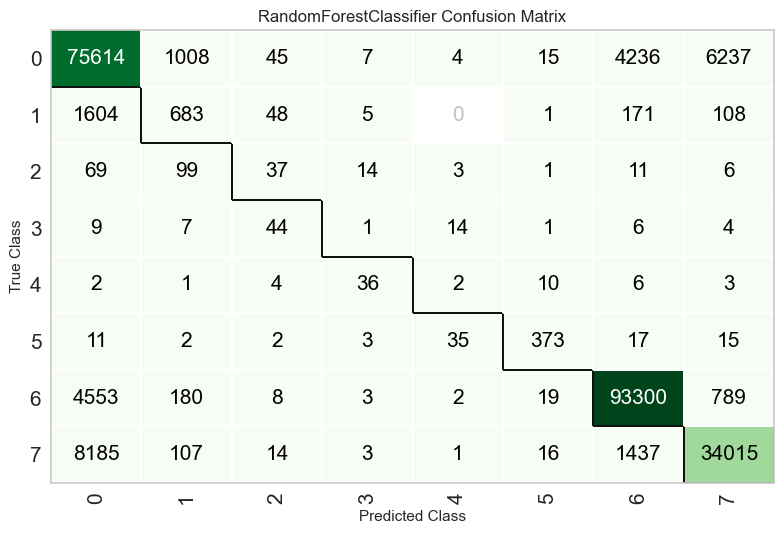

In [90]:
# O plot_model tem diversas funções para retornar o gráfico especifico de avaliação do modelo treinado

plot_model(modelo_random_forest, plot='confusion_matrix')

Curva ROC

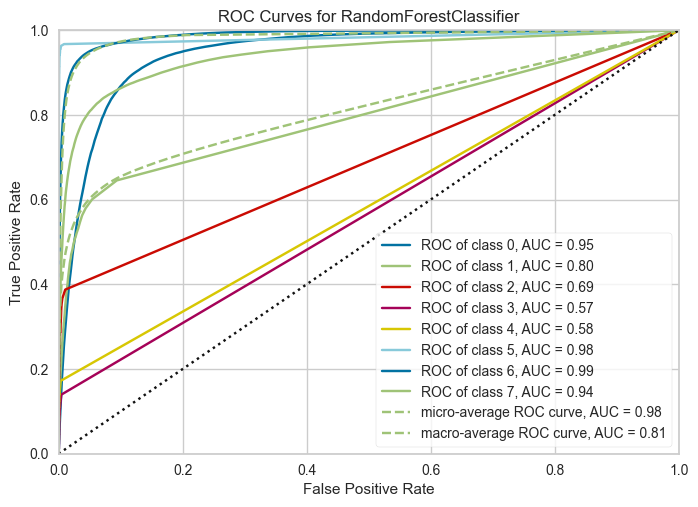

In [85]:
plot_model(modelo_random_forest, plot='auc')


### Conclusão

• Em uma situação de liberação de crédito para o cliente, o modelo visa identificar qual situação o cliente se enquadra para depois ser avaliado se é um bom cliente ou um cliente ruim, de acordo com cada uma de suas particularidade.<br>
• Em nosso modelo a Acurácia(ACC) indica que houve cerca de 87% predições corretas feitas pelo modelo em relação ao total de predições feitas.<br>
